In [99]:
import numpy as np
import os

from imantics import Polygons, Mask
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
from shapely.geometry import Polygon, Point
img = cv2.imread("/data/ij/background_remove/output_apple/generated_image_0.png")


In [100]:
img.shape

(256, 256, 3)

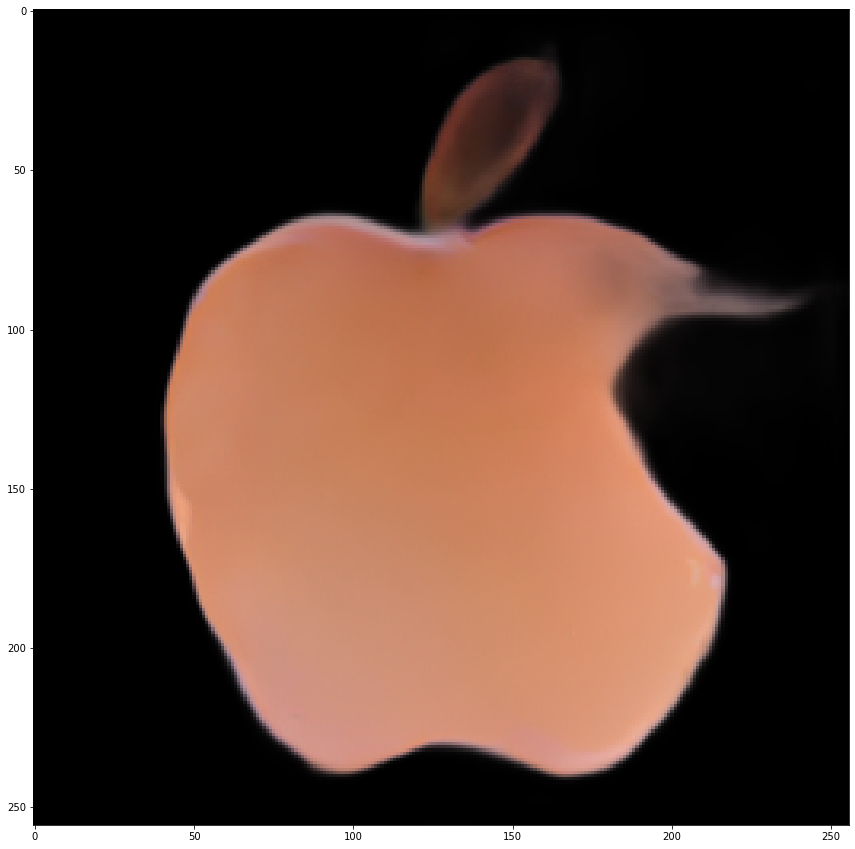

In [101]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.imshow(img)
plt.show()

In [102]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mean = np.mean(img)
print(mean)
ret, mask = cv2.threshold(gray, 5, 255, cv2.THRESH_BINARY)

57.98143513997396


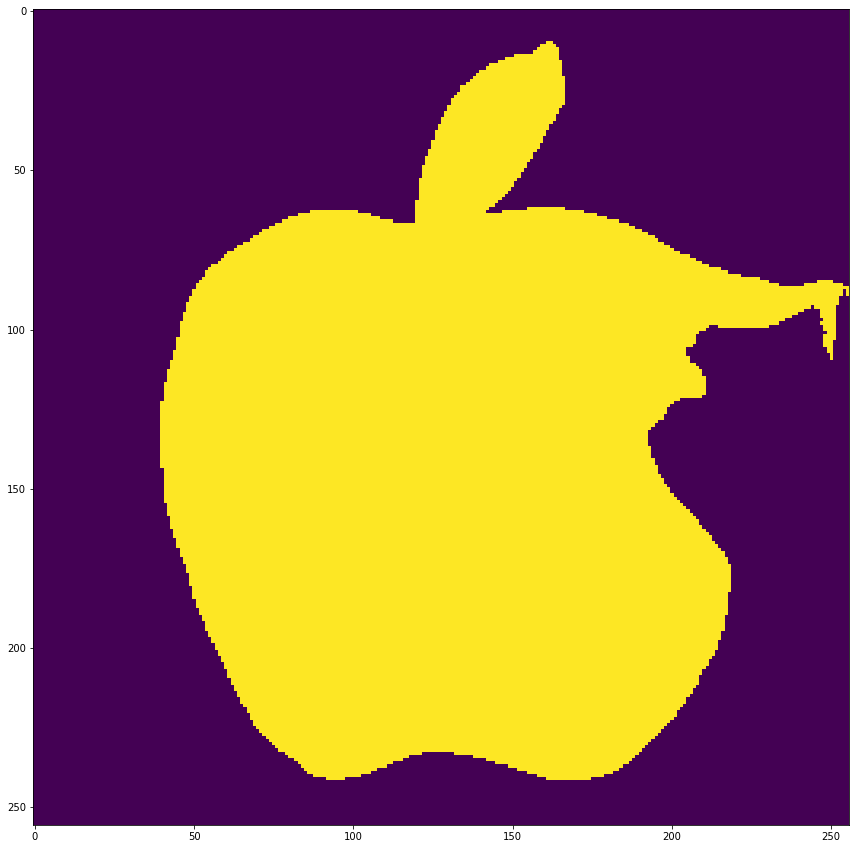

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [103]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.imshow(mask)
plt.show()
print(mask)

In [104]:
unique_vals = np.unique(mask)
unique_vals

array([  0, 255], dtype=uint8)

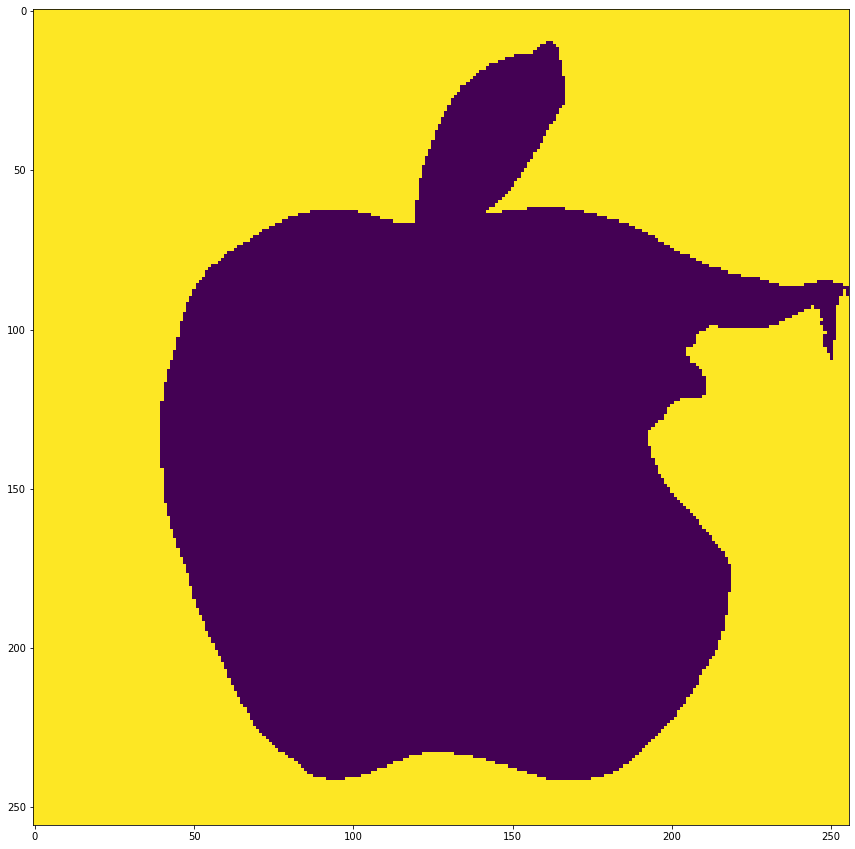

In [105]:
mask[mask==0] = 100
mask[mask==255] = 0
mask[mask==100] = 255
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.imshow(mask)
plt.show()

(256, 256, 3)


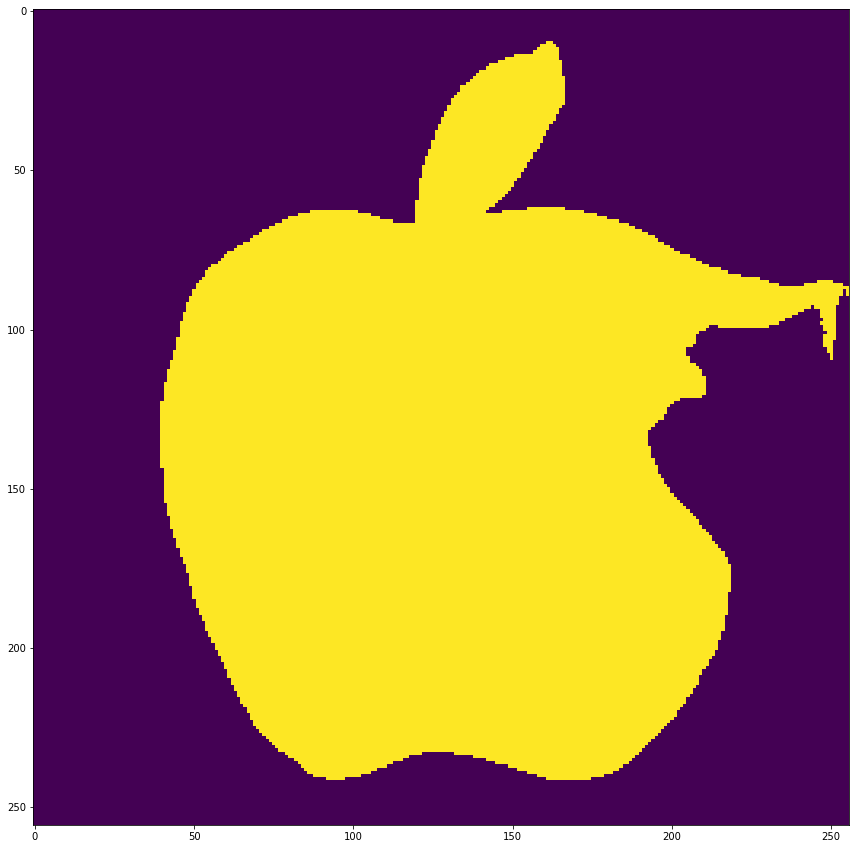

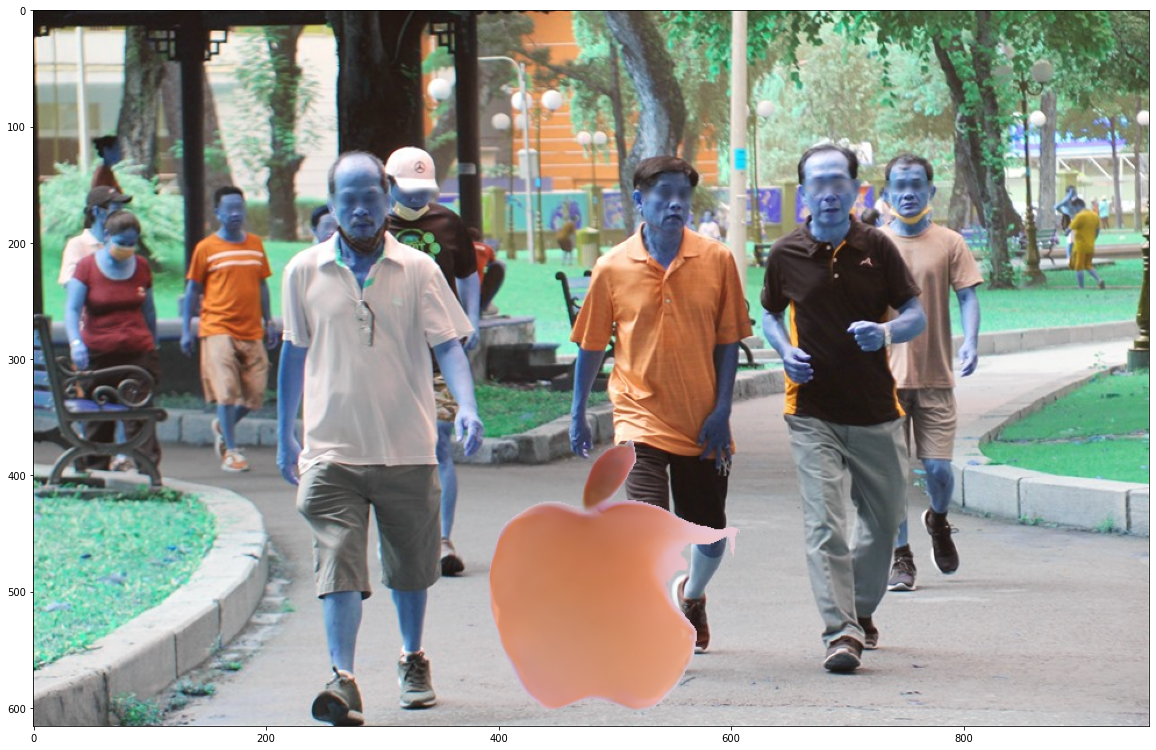

In [107]:

back_img = cv2.imread("/data/ij/Mosaic_data_augmentation_YOLO/images_ori/1.jpg")
target_img = cv2.imread("/data/ij/background_remove/apple/generated_image_0.png")
print(target_img.shape)
mask_inv = cv2.bitwise_not(mask)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.imshow(mask_inv)
plt.show()

height1, width1 = target_img.shape[:2]
height2, width2 = back_img.shape[:2]
x = (width2 - width1)//2
y = height2 - height1
w = x + width1
h = y + height1

roi = back_img[y:h, x:w]
fg = cv2.bitwise_and(target_img, target_img, mask=mask_inv)
bg = cv2.bitwise_and(roi, roi, mask=mask)
back_img[y:h, x:w] = fg + bg

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.imshow(back_img)
plt.show()